# CS170A -- HW#2: Eigenfaces -- Matlab

Your name:  Ryan Trihernawan

Your UID:  904-063-131

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor \,H\,/\,24\, \rfloor}$ points are
deducted.

## Problem 1:  Eigenfaces

Chapter 11 of the Course Reader is on Eigenfaces.
For this assignment we have included the face files
for this chapter in the directory <tt>old_faces</tt>.
It includes some Matlab scripts and a database of 177 face images,
each a grayscale <tt>.bmp</tt> bitmap file of size $64 \times 64$ pixels.
The face images have been pre-processed so that the background
and hair are removed and the faces have similar lighting conditions.

The Course Reader explains how to
reshape each face image into a $1 \times 64^2 \, = \, 1 \times 4096$ row vector, and collect them into a matrix.
The principal components of the matrix then define the main dimensions of variance in the faces.
The program <tt>more_efficient_eigenfaces.m</tt> shows how to do this.
These principal components are called <i>eigenfaces</i>.

### This Assignment uses a new Face Dataset -- with Normal and Smiling Faces

The goal of this problem is to apply the same ideas to a new set of 200 faces in the directory <tt>new_faces</tt>.
The subdirectory <tt>new_faces/faces</tt> has 200 faces that have been normalized, cropped, and equalized.
The subdirectory <tt>new_faces/smiling_faces</tt> has 200 images of the same people, but they are smiling.
Each of these images is a grayscale <tt>.jpg</tt> file with size $193 \times 162$.

### 1a:  The Average Face

Modify the program <tt>more_efficient_eigenfaces.m</tt> (available in this directory)
to use the <tt>new_faces</tt> images instead of the <tt>old_faces</tt> images.
Also, modify it to use the Matlab function <tt>imresize</tt> to downsample
each of the new faces by a factor of 3, so it is $64 \times 54$ (instead of $193 \times 162$).
Then: <i>pad</i> both sides of the image with <tt>zeros(64,5)</tt>
so the result is a $64 \times 64$ image.

Then: create a function that
takes as input a string array of filenames of face images, an integer $k$,
and an integer sample size $s$ ---
and yields the average face and the first $k$ singular values and eigenfaces as output values
for a sample of size $s$.

Apply your function to
both the <tt>new_faces/faces</tt>
and the <tt>new_faces/smiling_faces</tt>
directories,
and plot the absolute value of the difference between your average face and (your downsampled version of)
the average face provided in the directory.

(The <tt>imagesc</tt> function can display images with automatic rescaling of numeric values.)

In [1]:
% Helper functions
row = 64;
col = 64;

imresize64x64 = @(fn) [zeros(64,5) imresize(imread(fn), [64, 54]) zeros(64,5)];

image2vector = @(Bitmap) double(reshape(Bitmap, row*col, 1));

vector2image = @(Vec) reshape( uint8( min(max(Vec,0),255) ), row, col);

vector_render = @(Vec) imshow(vector2image(Vec));

In [2]:
type avg_face

function [avg_img, U, singular_values] = avg_face(filenames, k, samplesize)

row = 64;
col = 64;

%----------------------------------------------------------------------------------
%        Useful functions for converting  images  <-->  vectors
%----------------------------------------------------------------------------------
%
%   These bitmap images are 64x64 matrices of uint8 (unsigned 8-bit) values;
%   we convert these to double values in order to permit arithmetic.
%
%   We also convert 64 x 64 image matrices to 64^2 x 1 vectors (using reshape())
%   so that we can derive eigenfaces using Matlab's SVD/matrix functions.
%
%----------------------------------------------------------------------------------

image_vector = @(Bitmap) double(reshape(Bitmap,1,row*col));

vector_image = @(Vec) reshape( uint8( min(max(Vec,0),255) ), row, col);

vector_render = @(Vec) imshow(vector_image(Vec));

%----------------------------------------------------------------------------------
%        

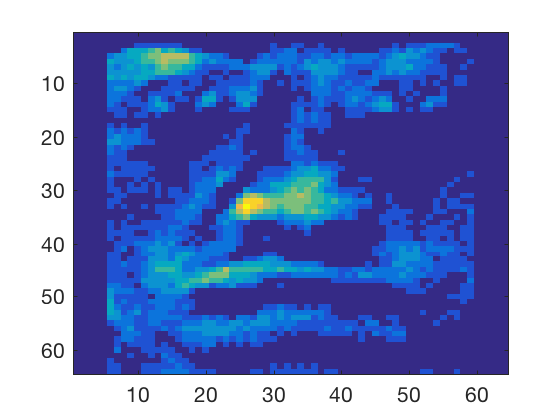

In [3]:
%  image showing the difference between your average normal face and the one provided

samplesize = 150;
k = 30;
filenames = dir('new_faces/faces/*.jpg');

% Remove the last row
filenames(end,:) = [];

[f_bar0, U, singular_values] = avg_face(filenames, k, samplesize);

% Average regular face provided
A = imresize64x64('new_faces/faces/averagefaceimage_seta.jpg');

imagesc(abs(vector2image(f_bar0) - A))

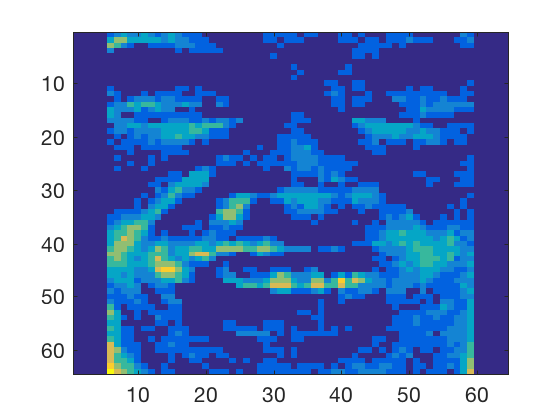

In [4]:
%  image showing the difference between your average smiling face and the one provided

samplesize = 150;
k = 30;
filenames = dir('new_faces/smiling_faces/*.jpg');

% Remove the last row
filenames(end,:) = [];

[f_bar1, U, singular_values] = avg_face(filenames, k, samplesize);

% Average regular face provided
A = imresize64x64('new_faces/smiling_faces/averagefaceimage_setb.jpg');

imagesc(abs(vector2image(f_bar1) - A))

### 1b: Smiling makes a Difference

If your mean normal face is $\overline{\mathbf{f}}_0$, and your mean smiling face is $\overline{\mathbf{f}}_1$,
render (using <tt>imagesc</tt>)
the difference $\overline{\mathbf{f}}_0-\overline{\mathbf{f}}_1$
(the average difference between normal faces and smiling faces).


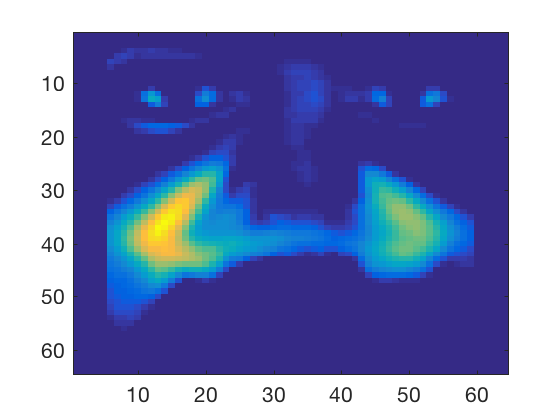

In [5]:
%  image showing the difference between the average normal face and average smiling face

imagesc(vector2image(f_bar0 - f_bar1))

### 1c: Scree Plots and $k$-Approximation

Using your downsampled images,
perform PCA on each set of faces (normal and smiling).

For each image (normal or smiling), construct its $64^2 \times 1$ vector $\mathbf{f}$.
Then, subtract the average face
($\overline{\mathbf{f}}_0$ or $\overline{\mathbf{f}}_1$)
and project the remainder on the first $k = 60$ eigenfaces.
For example, with a smiling face,
the projection of $\mathbf{f}$ on the $j$-th smiling eigenface $\mathbf{e}_j$ is
$$
c_j ~=~ {(\mathbf{f} \, - \, \overline{\mathbf{f}}_1)}' \, {\mathbf{e}_j}  ~~~~~~~~~~ (j = 1,\dots,k).
$$

For each set of faces (normal or smiling),
make one large scree plot for the set, showing all sequences of the first $k$ coefficients
for each image overplotted (e.g. with <tt>hold on</tt>).

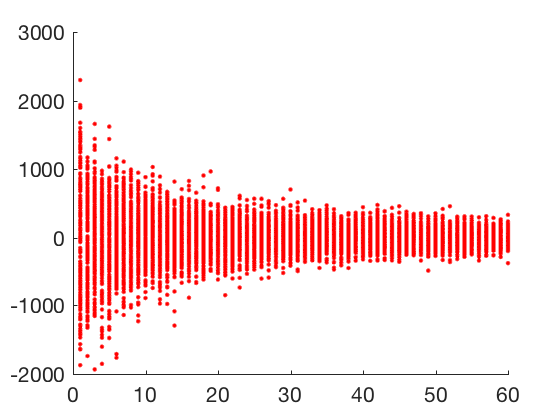

In [6]:
%  (overlaid) scree plots for normal faces

samplesize = 150;
k = 60;
filenames = dir('new_faces/faces/*.jpg');

% Remove the last row
filenames(end,:) = [];

[f_bar0, U, singular_values] = avg_face(filenames, k, samplesize);

n = max(size(filenames));

for i=1:n
    hold on
    
    filename = sprintf('%s/%s', filenames(i).folder, filenames(i).name);
    A = imresize64x64(filename);
    f = image2vector(A);
    
    c = (f - f_bar0)' * U;

    plot(c, 'r.');
end

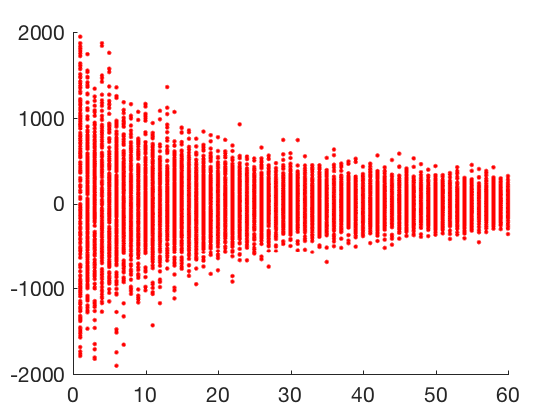

In [7]:
%  (overlaid) scree plots for smiling faces

samplesize = 150;
k = 60;
filenames = dir('new_faces/smiling_faces/*.jpg');

% Remove the last row
filenames(end,:) = [];

[f_bar1, U, singular_values] = avg_face(filenames, k, samplesize);

n = max(size(filenames));

for i=1:n
    hold on
    
    filename = sprintf('%s/%s', filenames(i).folder, filenames(i).name);
    A = imresize64x64(filename);
    f = image2vector(A);
    
    c = (f - f_bar1)' * U;

    plot(c, 'r.');
end

### 1d:  Unusualness of a Face

Let us say the <i>unusualness</i> of a face is the $L_2$ norm
of its eigenface-coefficient vector (using the first $k=60$ eigenfaces).

Determine, for each set (normal or smiling), the most unusual face.

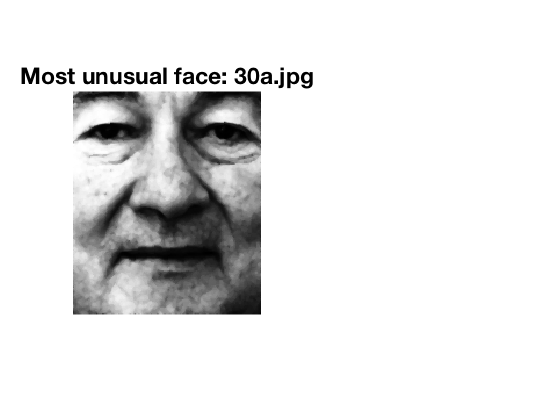

In [8]:
%  the most unusual normal face

samplesize = 150;
k = 60;
filenames = dir('new_faces/faces/*.jpg');

% Remove the last row
filenames(end,:) = [];

n = max(size(filenames));

[f_bar0, U, singular_values] = avg_face(filenames, k, samplesize);

max_filename_path = '100a.jpg';
max_filename = '100a.jpg';
max_norm = -10;

for i=1:n
    filename = sprintf('%s/%s', filenames(i).folder, filenames(i).name);
    A = imresize64x64(filename);
    
    c = U' * (image2vector(A) - f_bar0);
    cur_norm = norm(c,2);
    
    if cur_norm > max_norm
        max_norm = cur_norm;
        max_filename = filenames(i).name;
        max_filename_path = filename;
    end
end

figure
subplot(1,2,1)
most_unusual_face = imread(max_filename_path);
most_unusual_face_64x64 = imresize64x64(max_filename_path);
imshow(most_unusual_face);
title(sprintf('Most unusual face: %s', max_filename))

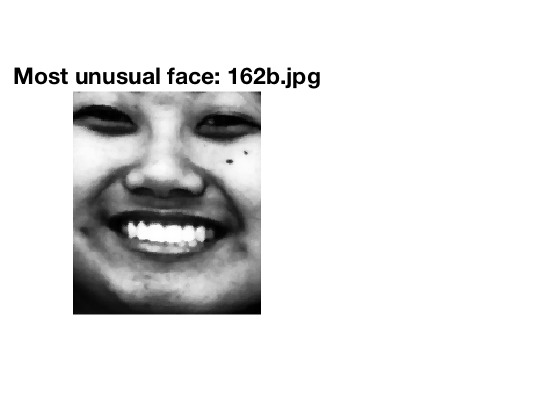

In [9]:
%  the most unusual smiling face

samplesize = 150;
k = 60;
filenames = dir('new_faces/smiling_faces/*.jpg');

% Remove the last row
filenames(end,:) = [];

n = max(size(filenames));

[f_bar1, U, singular_values] = avg_face(filenames, k, samplesize);

max_filename_path = '100b.jpg';
max_filename = '100b.jpg';
max_norm = -1;

for i=1:n
    filename = sprintf('%s/%s', filenames(i).folder, filenames(i).name);
    A = imresize64x64(filename);
    
    c = U' * (image2vector(A) - f_bar1);
    cur_norm = norm(c,2);
    
    if cur_norm > max_norm
        max_norm = cur_norm;
        max_filename = filenames(i).name;
        max_filename_path = filename;
    end
end

figure
subplot(1,2,1)
most_unusual_smiling_face = imread(max_filename_path);
most_unusual_smiling_face_64x64 = imresize64x64(max_filename_path);
imshow(most_unusual_smiling_face);
title(sprintf('Most unusual face: %s', max_filename))

## Problem 2: Face Classifiers

Develop two different face classifiers using the eigenfaces you've computed;
each should be a function that, given a face image $\mathbf{f}$ as input,
yields the output value 1 if $\mathbf{f}$ is smiling, and 0 otherwise.
(NOTE: or vice-versa; we just need the function to be a classifier)

Specifically, implement the following 3 classifiers that take an input image $\mathbf{f}$:
<ul><li>  {Classifier X}:   yield 1 if the normal face unusualness of $\mathbf{f}$ is greater than smiling face unusualness of $\mathbf{f}$, else 0.
<br/><br/>
</li><li>  {Classifier Y}:   yield 1 if $||{\mathbf{f} - \overline{\mathbf{f}}_0}||^2 ~\geq ~ ||{\mathbf{f} - \overline{\mathbf{f}}_1}||^2$, else 0.
<br/><br/>
<!--
</li><li>  {Classifier Z}:   if $C_0$ is the covariance matrix for normal faces, and $C_1$ is the covariance matrix for smiling faces,
yield 1 if $||{\mathbf{f} - \overline{\mathbf{f}}_0}||_{C_0}^2 ~\geq ~ ||{\mathbf{f} - \overline{\mathbf{f}}_1}||_{C_1}^2$, else 0.
<br/>
(Here: $||{\mathbf{x}}||_C^2 \;=\; {\mathbf{x}}' \; C^{-} \; \mathbf{x}$ is the kernel norm defined by the pseudo-inverse of the covariance matrix $C$.)
-->
</li></ul>

### 2a:  Unusual Face Classification

Using each of these classifiers, determine the classification it yields
for the two most unusual images you found in the previous question.

In [10]:
type classifierx

function X = classifierx(f, filenames, filenames_smiling)
    
    samplesize = max(size(filenames));
    k = 60;

    [f_bar0, U, singular_values] = avg_face(filenames, k, samplesize);
    [f_bar1, U_smiling, singular_values_smiling] = avg_face(filenames_smiling, k, samplesize);

    c = U' * (f - f_bar0);
    cur_norm = norm(c,2);

    c_smiling = U' * (f - f_bar1);
    cur_norm_smiling = norm(c_smiling,2);

    if cur_norm > cur_norm_smiling
        X = 1;
    else
        X = 0;
    end
end


In [11]:
type classifiery

function X = classifiery(f, filenames, filenames_smiling)
    
    samplesize = max(size(filenames));
    k = 60;
    
    [f_bar0, U, singular_values] = avg_face(filenames, k, samplesize);
    [f_bar1, U_smiling, singular_values_smiling] = avg_face(filenames_smiling, k, samplesize);

    dif = f - f_bar0;
    square_dif = dif' * dif;

    dif_smiling = f - f_bar1;
    square_dif_smiling = dif_smiling' * dif_smiling;

    if square_dif >= square_dif_smiling
        X = 1;
    else
        X = 0;
    end
end


In [12]:
%  X, Y classifications of the most unusual normal face

A = most_unusual_face_64x64;
f = image2vector(A);

filenames = dir('new_faces/faces/*.jpg');
filenames_smiling = dir('new_faces/smiling_faces/*.jpg');

disp('1 ~ similing | 0 ~ not smiling')

% Classfier X
X = classifierx(f, filenames, filenames_smiling)

% Classifier Y
Y = classifiery(f, filenames, filenames_smiling)

1 ~ similing | 0 ~ not smiling

X =

     1


Y =

     1


In [13]:
%  X, Y, Z classifications of the most unusual smiling face

A = most_unusual_smiling_face_64x64;
f = image2vector(A);

filenames = dir('new_faces/faces/*.jpg');
filenames_smiling = dir('new_faces/smiling_faces/*.jpg');

disp('1 ~ similing | 0 ~ not smiling')

% Classfier X
X = classifierx(f, filenames, filenames_smiling)

% Classifier Y
Y = classifiery(f, filenames, filenames_smiling)

1 ~ similing | 0 ~ not smiling

X =

     1


Y =

     1


### 2b:  Splitting into Training and Test sets

Write a function <tt>[Sublist1 Sublist2] = randsplit(List)</tt> that takes an array <tt>List</tt> of length <tt>n</tt>
and splits it randomly into two sublists of size <tt>floor(n/2)</tt> and <tt>ceil(n/2)</tt>.
(Hint: <tt>randperm</tt>)

Use <tt>randsplit</tt> to split each of the 200-face sets
into a <u>training subset</u> and <u>testing subset</u> of equal size.

For both sets of faces (100 normal faces and 100 smiling faces),
compute the average normal and smiling faces
$\overline{\mathbf{f}}_0$ and $\overline{\mathbf{f}}_1$
<u>for the training set</u>.

In [14]:
type randsplit

function [Sublist1 Sublist2] = randsplit(List)
    rp = randperm(max(size(List)));
    n = max(size(rp));
    l1 = rp(1:floor(n/2));
    l1n = max(size(l1));
    l2 = rp(floor(n/2)+1:n);
    l2n = max(size(l2));

    Sublist1 = List(1:l1n);
    Sublist2 = List(l1n+1:n);

    for i=1:l1n
        Sublist1(i) = List(l1(i));
    end

    for i=1:l2n
        Sublist2(i) = List(l2(i));
    end
end


In [15]:
% The average normal face (for the training set)

filenames = dir('new_faces/faces/*.jpg');

% Remove the last row
filenames(end,:) = [];

[training_subset0 test_subset0] = randsplit(filenames);

[f_bar0_training U singular_values] = avg_face(training_subset0, 60, 100);

disp('I do not diplay the vector because it is really big.')
size(f_bar0_training)

I do not diplay the vector because it is really big.

ans =

        4096           1


In [16]:
% The average smiling face (for the training set)

filenames = dir('new_faces/smiling_faces/*.jpg');

% Remove the last row
filenames(end,:) = [];

[training_subset1 test_subset1] = randsplit(filenames);

[f_bar1_training U singular_values] = avg_face(training_subset1, 60, 100);

disp('I do not diplay the vector because it is really big.')
size(f_bar1_training)

I do not diplay the vector because it is really big.

ans =

        4096           1


### 2c:  Classifier Error Rate

For each of the Classifiers (X, Y), using the average faces you just computed: 
<ul><li>
classify each of the 200 faces $\mathbf{f}$ in the testing set, and count classification errors.
</li><li>
compute the <i>error rate</i> (percentage of errors in test face classifications) for the Classifier.
</li></ul>

Then rank the classifiers by their error rate.

#### For normal faces (using the test set):

In [17]:
% X, Y error rates

% Classifier X
total_sum_x = 0;
total_sum_y = 0;

for i=1:size(test_subset0,1)
    f0 = image2vector(imresize64x64(sprintf('%s/%s', test_subset0(i).folder, test_subset0(i).name)));
    
    total_sum_x = total_sum_x + classifierx(f0, training_subset0, training_subset1);
    total_sum_y = total_sum_y + classifiery(f0, training_subset0, training_subset1);
end

disp(sprintf('Error rate for Classifier X: %d%%', total_sum_x))
disp(sprintf('Error rate for Classifier Y: %d%%', total_sum_y))

Error rate for Classifier X: 9%
Error rate for Classifier Y: 6%


In [18]:
%  which of the classifiers has lowest error rate for normal faces in the test set?
if total_sum_x > total_sum_y
    classifier = 'Y';
elseif total_sum_x == total_sum_y
    classifier = 'X and Y';
else
    classifier = 'X';
end

disp(sprintf('Classifier %s has the lowest error rate for normal faces in the test set.', classifier))

Classifier Y has the lowest error rate for normal faces in the test set.


#### For smiling faces (using the test set):

In [19]:
% X, Y error rates

% Classifier X, Y
total_sum_x = 0;
total_sum_y = 0;

for i=1:size(test_subset1,1)
    f1 = image2vector(imresize64x64(sprintf('%s/%s', test_subset1(i).folder, test_subset1(i).name)));
    
    total_sum_x = total_sum_x + classifierx(f1, training_subset0, training_subset1);
    total_sum_y = total_sum_y + classifiery(f1, training_subset0, training_subset1);
end

disp(sprintf('Error rate for Classifier X: %d%%', 100 - total_sum_x))
disp(sprintf('Error rate for Classifier Y: %d%%', 100 - total_sum_y))

Error rate for Classifier X: 15%
Error rate for Classifier Y: 14%


In [20]:
%  which of the classifiers has lowest error rate for smiling faces in the test set?
if total_sum_x < total_sum_y
    classifier = 'Y';
elseif total_sum_x == total_sum_y
    classifier = 'X and Y';
else
    classifier = 'X';
end

disp(sprintf('Classifier %s has the lowest error rate for smiling faces in the test set.', classifier))

Classifier Y has the lowest error rate for smiling faces in the test set.


## Problem 3:  Face Compression

In the previous problem you computed the first 60 Eigenface coefficients, and used these to find the most unusual face.

For each $64 \times 64$ image $X$ from your (downsampled) smiling faces, compute the following sequences:
<ul><li> (descendingly sorted absolute values of) the first 60 Eigenface coefficients for $X$
</li><li> (descendingly sorted absolute values of) the first 60 coefficient values from the two-sided FFT of $X$  (in Matlab: <tt>fft2(X)</tt>)
</li><li> (descendingly sorted absolute values of) the first 60 coefficient values from the two-sided DCT of $X$  (in Matlab: <tt>dct2(X)</tt>)
</li><li> the first 60 singular values from the SVD of $X$.
</li></ul>

We get an <i>image compression</i> scheme if we keep only the first $k \leq 60$ coefficients, and discard the rest.

Define
$$
\mbox{$k$-coefficient compression error} ~~=~~
\frac{\mbox{(the sum of absolute values of all coefficients after the first $k$)}}{\mbox{(the sum of absolute values of all coefficients)}} .
$$

Compute the $k$-coefficient compression error for each of the 4 transforms,
$1 \leq k \leq 60$, <u>for the smiling test set</u>.

Rank the 4 transforms above by their average compression error (for $k \leq 60$).

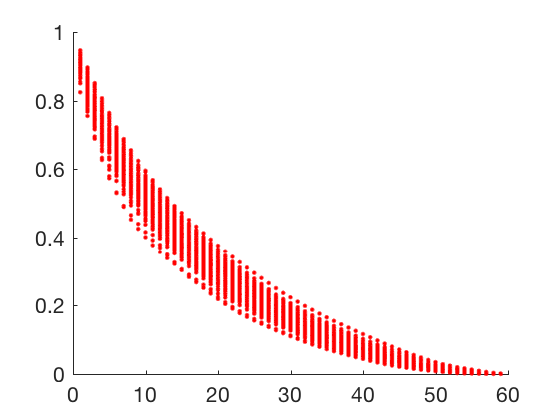

Average compression error: 0.241659


In [21]:
%  plot of the Eigenface's k-coefficient compression error   (for k <= 60)

samplesize = 100;
n = max(size(test_subset1));

total_compression_error = 0;

for i=1:n
    filename = sprintf('%s/%s', test_subset1(i).folder, test_subset1(i).name);
    A = imresize64x64(filename);
    f = image2vector(A);
    
    [f_bar1_all, U_all, singular_values_all] = avg_face(test_subset1, 60, samplesize);
    c_all = U_all' * (f - f_bar1_all);
    c_all = sort(abs(c_all), 'descend');
    
    % 1 <= k <= 60
    for k=1:59
        k_coeff_comp_error = sum(c_all(k+1:60,:)) / sum(c_all);
        total_compression_error = total_compression_error + k_coeff_comp_error;
        
        hold on
        plot(k, k_coeff_comp_error, 'r.');
    end
end

disp(sprintf('Average compression error: %f', total_compression_error / (n * 60)))

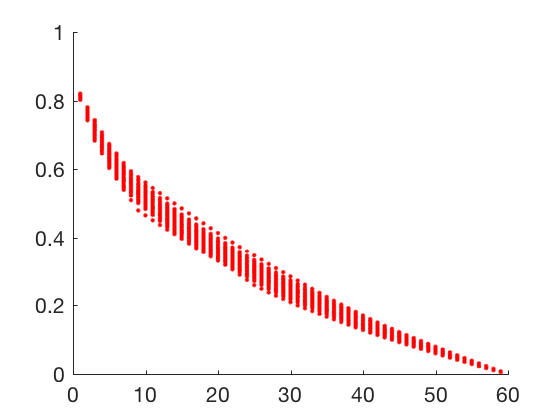

Average compression error: 0.282019


In [22]:
%  plot of the two-sided FFT's k-coefficient compression error  (for k <= 60)

%%%   You might do something like this:
%   TwoSidedFFTofX = fft2(X);
%   SortedAbsoluteValuesOfFourierCoefficients = sort(abs(TwoSidedFFTofX(:)), 'descend');
%   figure
%   plot( SortedAbsoluteValuesOfFourierCoefficients(1:60) )

samplesize = 100;
n = max(size(test_subset1));

total_compression_error = 0;

for i=1:n
    filename = sprintf('%s/%s', test_subset1(i).folder, test_subset1(i).name);
    A = imresize64x64(filename);
    
    TwoSidedFFTofX = fft2(A);
    SortedAbsoluteValuesOfFourierCoefficients = sort(abs(TwoSidedFFTofX(:)), 'descend');
    
    c_all = SortedAbsoluteValuesOfFourierCoefficients(1:60);
    
    % 1 <= k <= 60
    for k=1:59
        k_coeff_comp_error = sum(c_all(k+1:60,:)) / sum(c_all);
        total_compression_error = total_compression_error + k_coeff_comp_error;
        
        hold on
        plot(k, k_coeff_comp_error, 'r.');
    end
end

disp(sprintf('Average compression error: %f', total_compression_error / (n * 60)))

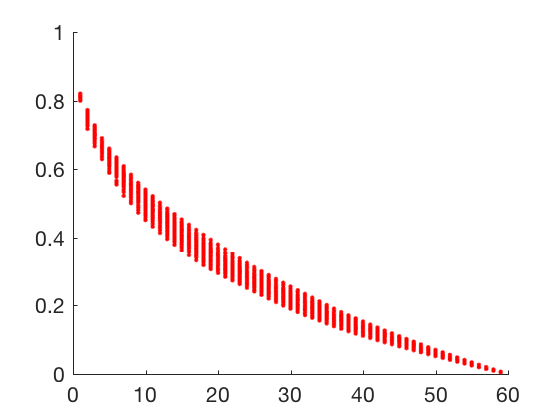

Average compression error: 0.267501


In [23]:
%  plot of the two-sided DCT's k-coefficient compression error  (for k <= 60)

samplesize = 100;
n = max(size(test_subset1));

total_compression_error = 0;

for i=1:n
    filename = sprintf('%s/%s', test_subset1(i).folder, test_subset1(i).name);
    A = imresize64x64(filename);
    
    TwoSidedDCTofX = dct2(A);
    SortedAbsoluteValuesOfDCTCoefficients = sort(abs(TwoSidedDCTofX(:)), 'descend');
    
    c_all = SortedAbsoluteValuesOfDCTCoefficients(1:60);
    
    % 1 <= k <= 60
    for k=1:59
        k_coeff_comp_error = sum(c_all(k+1:60,:)) / sum(c_all);
        total_compression_error = total_compression_error + k_coeff_comp_error;
        
        hold on
        plot(k, k_coeff_comp_error, 'r.');
    end
end

disp(sprintf('Average compression error: %f', total_compression_error / (n * 60)))

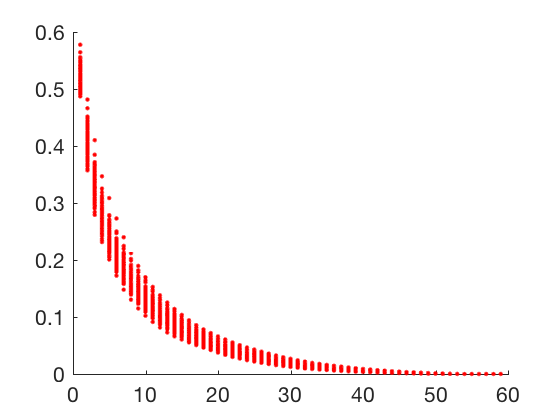

Average compression error: 0.063373


In [24]:
%  plot of the rank-k singular value compression error (for k <= 60)

samplesize = 100;
n = max(size(test_subset1));

total_compression_error = 0;

for i=1:n
    filename = sprintf('%s/%s', test_subset1(i).folder, test_subset1(i).name);
    A = imresize64x64(filename);
    
    [U S V] = svds(double(A), 60);
    %[U S V] = svd(double(A));
    
    singular_values = diag(S);
    sorted_sv = sort(abs(singular_values), 'descend');
    
    c_all = sorted_sv;
    
    % 1 <= k <= 60
    for k=1:59
        k_coeff_comp_error = sum(c_all(k+1:60,:)) / sum(c_all);
        total_compression_error = total_compression_error + k_coeff_comp_error;
        
        hold on
        plot(k, k_coeff_comp_error, 'r.');
    end
end

disp(sprintf('Average compression error: %f', total_compression_error / (n * 60)))

In [25]:
%  which of the 4 compression schemes has lowest average compression error?

disp(sprintf('Lowest average compression error: rank-k singular value compression'))

Lowest average compression error: rank-k singular value compression
